In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('coronavirus.csv',parse_dates=['Date'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [4]:
df.shape

(23688, 5)

In [5]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [6]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [7]:
df.nunique()

Date          126
Country       188
Confirmed    5308
Recovered    3303
Deaths       1768
dtype: int64

In [8]:
count=df.isnull().sum()
count

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

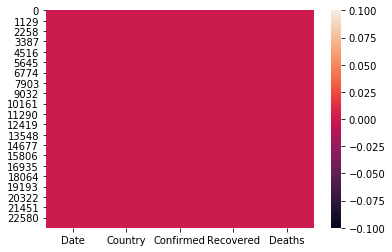

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [11]:
dfnew=pd.DataFrame()
dfnew['month']=df['Date'].dt.month_name()
dfnew['year']=df['Date'].dt.year
dfnew['day']=df['Date'].dt.day_name()
dfnew['Country']=df['Country']
dfnew['Confirmed']=df['Confirmed']
dfnew['Recovered']=df['Recovered']
dfnew['Deaths']=df['Deaths']
dfnew

,month,year,day,Country,Confirmed,Recovered,Deaths
0,January,2020,Wednesday,Afghanistan,0,0,0
1,January,2020,Wednesday,Albania,0,0,0
2,January,2020,Wednesday,Algeria,0,0,0
3,January,2020,Wednesday,Andorra,0,0,0
4,January,2020,Wednesday,Angola,0,0,0
...,...,...,...,...,...,...,...
23683,May,2020,Tuesday,West Bank and Gaza,429,365,3
23684,May,2020,Tuesday,Western Sahara,9,6,1
23685,May,2020,Tuesday,Yemen,249,10,49
23686,May,2020,Tuesday,Zambia,920,336,7


In [12]:
#dfnew = dfnew.drop(dfnew[dfnew['Confirmed']==0].index)
#dfnew

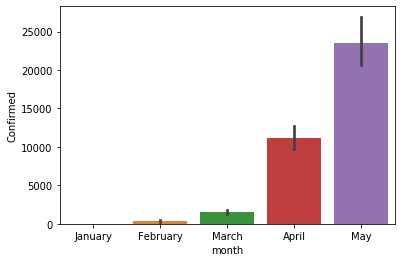

In [13]:
sns.barplot(x='month',y='Confirmed',data=dfnew)
plt.show()

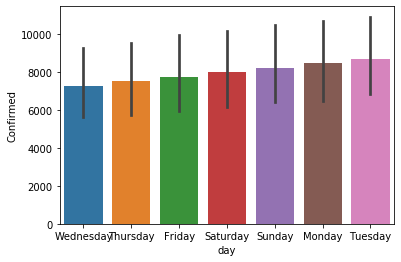

In [14]:
sns.barplot(x='day',y='Confirmed',data=dfnew)
plt.show()

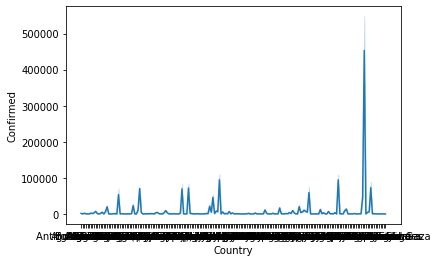

In [15]:
sns.lineplot(x='Country',y='Confirmed',data=dfnew)
plt.show()

In [16]:
dfnew['Country'].nunique()

188

In [17]:
dfnew = dfnew.drop(columns=['year','day'])
dfnew

,month,Country,Confirmed,Recovered,Deaths
0,January,Afghanistan,0,0,0
1,January,Albania,0,0,0
2,January,Algeria,0,0,0
3,January,Andorra,0,0,0
4,January,Angola,0,0,0
...,...,...,...,...,...
23683,May,West Bank and Gaza,429,365,3
23684,May,Western Sahara,9,6,1
23685,May,Yemen,249,10,49
23686,May,Zambia,920,336,7


In [18]:
dfg=df.groupby(['Country'])[["Confirmed", "Recovered", "Deaths"]].sum()
dfg   

,Confirmed,Recovered,Deaths
Country,,,
Afghanistan,185236,20845,4669
Albania,41253,25688,1629
Algeria,240070,107345,23232
Andorra,41573,20751,2219
Angola,1892,506,131
...,...,...,...
West Bank and Gaza,19971,8798,113
Western Sahara,307,186,1
Yemen,2696,92,460


In [19]:
dfg.reset_index(level=0, inplace=True) 
dfg

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,185236,20845,4669
1,Albania,41253,25688,1629
2,Algeria,240070,107345,23232
3,Andorra,41573,20751,2219
4,Angola,1892,506,131
...,...,...,...,...
183,West Bank and Gaza,19971,8798,113
184,Western Sahara,307,186,1
185,Yemen,2696,92,460
186,Zambia,15285,5281,215


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()
dfg['Country']=le.fit_transform(dfg['Country'])
dfg

,Country,Confirmed,Recovered,Deaths
0,0,185236,20845,4669
1,1,41253,25688,1629
2,2,240070,107345,23232
3,3,41573,20751,2219
4,4,1892,506,131
...,...,...,...,...
183,183,19971,8798,113
184,184,307,186,1
185,185,2696,92,460
186,186,15285,5281,215


In [22]:
dco=dfg.corr()
dco

,Country,Confirmed,Recovered,Deaths
Country,1.000000,0.111820,0.032929,0.106098
Confirmed,0.111820,1.000000,0.801388,0.926449
Recovered,0.032929,0.801388,1.000000,0.759967
Deaths,0.106098,0.926449,0.759967,1.000000


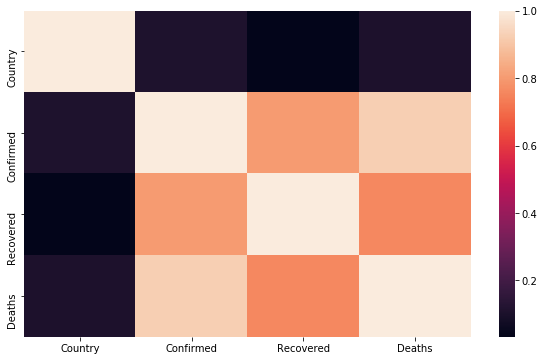

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(dco)

In [24]:
from scipy.stats import zscore

In [25]:
z_score=abs(zscore(dfg))
print(dfg.shape)
dffinal=dfg.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(188, 4)
(180, 4)


In [26]:
dffinal.skew()

Country     -0.011727
Confirmed    5.118627
Recovered    5.341386
Deaths       5.738276
dtype: float64

In [27]:
dfp=pd.DataFrame(dffinal)
dfp

,Country,Confirmed,Recovered,Deaths
0,0,185236,20845,4669
1,1,41253,25688,1629
2,2,240070,107345,23232
3,3,41573,20751,2219
4,4,1892,506,131
...,...,...,...,...
183,183,19971,8798,113
184,184,307,186,1
185,185,2696,92,460
186,186,15285,5281,215


In [28]:
for colu in dfp.columns:
    if dfp.skew().loc[colu]>0.55:
        dfp[colu]=np.log1p(dfp[colu])

In [29]:
dfp.skew()

Country     -0.011727
Confirmed   -0.183249
Recovered   -0.467191
Deaths      -0.533662
dtype: float64

In [30]:
dfp

,Country,Confirmed,Recovered,Deaths
0,0,12.129391,9.944917,8.448914
1,1,10.627503,10.153818,7.396335
2,2,12.388690,11.583813,10.053329
3,3,10.635230,9.940398,7.705262
4,4,7.545918,6.228511,4.882802
...,...,...,...,...
183,183,9.902087,9.082393,4.736198
184,184,5.730100,5.231109,0.693147
185,185,7.899895,4.532599,6.133398
186,186,9.634693,8.572060,5.375278


In [31]:
x=dfp.drop(columns=['Deaths'])
y=dfp['Deaths']

In [32]:
x

,Country,Confirmed,Recovered
0,0,12.129391,9.944917
1,1,10.627503,10.153818
2,2,12.388690,11.583813
3,3,10.635230,9.940398
4,4,7.545918,6.228511
...,...,...,...
183,183,9.902087,9.082393
184,184,5.730100,5.231109
185,185,7.899895,4.532599
186,186,9.634693,8.572060


In [33]:
y

0       8.448914
1       7.396335
2      10.053329
3       7.705262
4       4.882802
         ...    
183     4.736198
184     0.693147
185     6.133398
186     5.375278
187     5.298317
Name: Deaths, Length: 180, dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-1.71271592e+00,  6.26548839e-01,  2.11173435e-01],
       [-1.69429742e+00,  1.29192725e-02,  2.90909388e-01],
       [-1.67587892e+00,  7.32491029e-01,  8.36728095e-01],
       [-1.65746042e+00,  1.60762660e-02,  2.09448391e-01],
       [-1.63904192e+00, -1.24613053e+00, -1.20735250e+00],
       [-1.62062341e+00, -1.39065723e+00, -1.14819177e+00],
       [-1.60220491e+00,  7.99045809e-01,  7.31668774e-01],
       [-1.58378641e+00,  5.38102882e-01,  6.10348366e-01],
       [-1.56536791e+00,  9.47249899e-01,  1.16918903e+00],
       [-1.54694941e+00,  1.28105085e+00,  1.50294449e+00],
       [-1.52853091e+00,  4.27444865e-01,  6.51972823e-01],
       [-1.51011241e+00, -9.29977733e-01, -8.61698003e-01],
       [-1.49169391e+00,  6.86907757e-01,  8.00922338e-01],
       [-1.47327541e+00,  1.09912761e+00,  7.96921818e-01],
       [-1.45485691e+00, -8.86572124e-01, -6.66536902e-01],
       [-1.43643841e+00,  1.24205670e+00,  1.13480157e+00],
       [-1.41801991e+00,  1.68669689e+00

In [36]:
xd=pd.DataFrame(x)
xd

,0,1,2
0,-1.712716,0.626549,0.211173
1,-1.694297,0.012919,0.290909
2,-1.675879,0.732491,0.836728
3,-1.657460,0.016076,0.209448
4,-1.639042,-1.246131,-1.207352
...,...,...,...
175,1.657870,-0.283466,-0.118046
176,1.676288,-1.988023,-1.588054
177,1.694707,-1.101505,-1.854670
178,1.713125,-0.392715,-0.312836


In [37]:
xd.skew()

0   -0.011727
1   -0.183249
2   -0.467191
dtype: float64

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=.22,random_state=42)

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
def maxr2_score(regr,xd,y):
    max_r_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=.22,random_state=r_state)
        regr.fit(xtrain,ytrain)
        ypred=regr.predict(xtest)
        r2_scr=r2_score(ytest,ypred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score= r2_scr
            finalrstate=r_state
    print('max r2 score corresponding to',finalrstate,'is',max_r_score)
    return finalrstate

In [40]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,xd,y)

r2 score corresponding to  42 is 0.8410845074870646
r2 score corresponding to  43 is 0.7042414290796464
r2 score corresponding to  44 is 0.7431043513552951
r2 score corresponding to  45 is 0.7158259083151643
r2 score corresponding to  46 is 0.8034940398173609
r2 score corresponding to  47 is 0.7792246199711099
r2 score corresponding to  48 is 0.6639631511750849
r2 score corresponding to  49 is 0.8653821200408087
r2 score corresponding to  50 is 0.7955722510390848
r2 score corresponding to  51 is 0.8163516079480855
r2 score corresponding to  52 is 0.6416044970363759
r2 score corresponding to  53 is 0.8420692241859491
r2 score corresponding to  54 is 0.7481320082595806
r2 score corresponding to  55 is 0.7392073000225217
r2 score corresponding to  56 is 0.7067745962715215
r2 score corresponding to  57 is 0.78484957560334
r2 score corresponding to  58 is 0.7418189899416345
r2 score corresponding to  59 is 0.7843474117868661
r2 score corresponding to  60 is 0.7266629453270368
r2 score corre

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(xd,y)
gknr.best_params_

{'n_neighbors': 5}

In [42]:
knr=KNeighborsRegressor(n_neighbors=5)
r_state=maxr2_score(knr,xd,y)

r2 score corresponding to  42 is 0.7335948772518684
r2 score corresponding to  43 is 0.5682870878379909
r2 score corresponding to  44 is 0.6765661430265679
r2 score corresponding to  45 is 0.6325157511097228
r2 score corresponding to  46 is 0.7614375951832878
r2 score corresponding to  47 is 0.7071548353807122
r2 score corresponding to  48 is 0.532119600057176
r2 score corresponding to  49 is 0.7671398082991507
r2 score corresponding to  50 is 0.6277581508263533
r2 score corresponding to  51 is 0.7714559067256541
r2 score corresponding to  52 is 0.47065269077508187
r2 score corresponding to  53 is 0.7850843636012802
r2 score corresponding to  54 is 0.6664888581801509
r2 score corresponding to  55 is 0.665952054895105
r2 score corresponding to  56 is 0.5657838358492884
r2 score corresponding to  57 is 0.6808353053815015
r2 score corresponding to  58 is 0.6952737907562014
r2 score corresponding to  59 is 0.6486720149385854
r2 score corresponding to  60 is 0.6212238799196669
r2 score corr

In [43]:
from sklearn.model_selection import cross_val_score
print('mean r2 score for LR',cross_val_score(lreg,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for LR is',cross_val_score(lreg,xd,y,cv=10,scoring='r2').std())

mean r2 score for LR 0.7278696375866602
Std dev. in r2 score for LR is 0.1227417167770025


In [44]:
print('mean r2 score for KNN',cross_val_score(knr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for KNR is',cross_val_score(knr,xd,y,cv=10,scoring='r2').std())

mean r2 score for KNN 0.6608713796232345
Std dev. in r2 score for KNR is 0.13715491002783847


In [45]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet


In [46]:
alphavalue={'alpha':[1,0.1,0.001,0.0001,0]}
list=[Lasso(),Ridge(),ElasticNet()]
for i in list:
    grid=GridSearchCV(estimator=i,param_grid=alphavalue)
    grid.fit(xd,y)
    print(grid.best_score_)
    print(grid.best_estimator_.alpha)
    print(grid.best_params_)
    print('\n')

0.7641089373063386
0.001
{'alpha': 0.001}


0.7641244525799411
0.1
{'alpha': 0.1}


0.7641197312732027
0.001
{'alpha': 0.001}




In [47]:
rd=Ridge(alpha=0.001)
r_state=maxr2_score(rd,xd,y)

r2 score corresponding to  42 is 0.8410792136327446
r2 score corresponding to  43 is 0.7042426654950114
r2 score corresponding to  44 is 0.743108301202224
r2 score corresponding to  45 is 0.71582948790858
r2 score corresponding to  46 is 0.8034949887217001
r2 score corresponding to  47 is 0.7792351003305774
r2 score corresponding to  48 is 0.6639610725077435
r2 score corresponding to  49 is 0.8653881443771052
r2 score corresponding to  50 is 0.7955696334308416
r2 score corresponding to  51 is 0.8163516815347825
r2 score corresponding to  52 is 0.6416022701535182
r2 score corresponding to  53 is 0.8420735573031648
r2 score corresponding to  54 is 0.7481299368604257
r2 score corresponding to  55 is 0.7391996231660095
r2 score corresponding to  56 is 0.7067811110048238
r2 score corresponding to  57 is 0.7848464352155924
r2 score corresponding to  58 is 0.7418114259112032
r2 score corresponding to  59 is 0.784338093113526
r2 score corresponding to  60 is 0.7266828689419584
r2 score corresp

In [48]:
print('mean r2 score for RR',cross_val_score(rd,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for RR is',cross_val_score(rd,xd,y,cv=10,scoring='r2').std())

mean r2 score for RR 0.727870555005085
Std dev. in r2 score for RR is 0.1227373437012139


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [50]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print('mean r2 score for GBR is',cross_val_score(gbr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for GBR is',cross_val_score(gbr,xd,y,cv=10,scoring='r2').std())

mean r2 score for GBR is 0.675246962250001
Std dev. in r2 score for GBR is 0.1710463268828338


In [51]:
from sklearn.svm import SVR

In [52]:
svr=SVR()
parameters={'kernel':['linear','poly','rbf'],'C':[1,10]}
clf=GridSearchCV(svr,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_


{'C': 10, 'kernel': 'linear'}

In [53]:
svr=SVR(kernel='linear',C=10)
r_state=maxr2_score(rd,xd,y)

r2 score corresponding to  42 is 0.8410792136327446
r2 score corresponding to  43 is 0.7042426654950114
r2 score corresponding to  44 is 0.743108301202224
r2 score corresponding to  45 is 0.71582948790858
r2 score corresponding to  46 is 0.8034949887217001
r2 score corresponding to  47 is 0.7792351003305774
r2 score corresponding to  48 is 0.6639610725077435
r2 score corresponding to  49 is 0.8653881443771052
r2 score corresponding to  50 is 0.7955696334308416
r2 score corresponding to  51 is 0.8163516815347825
r2 score corresponding to  52 is 0.6416022701535182
r2 score corresponding to  53 is 0.8420735573031648
r2 score corresponding to  54 is 0.7481299368604257
r2 score corresponding to  55 is 0.7391996231660095
r2 score corresponding to  56 is 0.7067811110048238
r2 score corresponding to  57 is 0.7848464352155924
r2 score corresponding to  58 is 0.7418114259112032
r2 score corresponding to  59 is 0.784338093113526
r2 score corresponding to  60 is 0.7266828689419584
r2 score corresp

In [54]:
svr=SVR(kernel='rbf',C=1)
print('mean r2 score for SVR is',cross_val_score(svr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for SVR is',cross_val_score(svr,xd,y,cv=10,scoring='r2').std())

mean r2 score for SVR is 0.6444005542689542
Std dev. in r2 score for SVR is 0.18247245321975025


In [55]:
from sklearn.ensemble import RandomForestRegressor


In [56]:
rfr=RandomForestRegressor()
parameters={'n_estimators':[10,500]}
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_

{'n_estimators': 500}

In [57]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,xd,y)

r2 score corresponding to  42 is 0.7985661700118927
r2 score corresponding to  43 is 0.6043989746735134
r2 score corresponding to  44 is 0.6809558241010509
r2 score corresponding to  45 is 0.6868936018579166
r2 score corresponding to  46 is 0.7869989345056445
r2 score corresponding to  47 is 0.736604033729289
r2 score corresponding to  48 is 0.5773324283499092
r2 score corresponding to  49 is 0.7806965068503448
r2 score corresponding to  50 is 0.7097723064888325
r2 score corresponding to  51 is 0.7802843067318764
r2 score corresponding to  52 is 0.441652687593428
r2 score corresponding to  53 is 0.7906352846441067
r2 score corresponding to  54 is 0.7244359979739372
r2 score corresponding to  55 is 0.6210206716961102
r2 score corresponding to  56 is 0.5836052762070266
r2 score corresponding to  57 is 0.7298197775540008
r2 score corresponding to  58 is 0.693205446230093
r2 score corresponding to  59 is 0.7018479888685332
r2 score corresponding to  60 is 0.700719746006709
r2 score corresp

In [58]:
rfr=RandomForestRegressor(n_estimators=500)
print('mean r2 score for SVR is',cross_val_score(rfr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for SVR is',cross_val_score(rfr,xd,y,cv=10,scoring='r2').std())

mean r2 score for SVR is 0.6765609291564919
Std dev. in r2 score for SVR is 0.16449340500148937


In [59]:
from sklearn.ensemble import AdaBoostRegressor
adareg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[100,500],'base_estimator':[lreg,rd]}
clf=GridSearchCV(adareg,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_

{'base_estimator': Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'learning_rate': 1,
 'n_estimators': 500}

In [60]:
adareg=AdaBoostRegressor(learning_rate=1,n_estimators=100,base_estimator=rd)
r_state=maxr2_score(adareg,xd,y)

r2 score corresponding to  42 is 0.8364161287720699
r2 score corresponding to  43 is 0.6712678136670239
r2 score corresponding to  44 is 0.7183921908416486
r2 score corresponding to  45 is 0.7312196361423047
r2 score corresponding to  46 is 0.7741735712690977
r2 score corresponding to  47 is 0.7606483679612301
r2 score corresponding to  48 is 0.6506433660274441
r2 score corresponding to  49 is 0.85111343274215
r2 score corresponding to  50 is 0.798721375591717
r2 score corresponding to  51 is 0.8115538981947206
r2 score corresponding to  52 is 0.6398252735965413
r2 score corresponding to  53 is 0.8477095028510253
r2 score corresponding to  54 is 0.7459670316313746
r2 score corresponding to  55 is 0.7386294060151807
r2 score corresponding to  56 is 0.7027043572472519
r2 score corresponding to  57 is 0.7801738063140657
r2 score corresponding to  58 is 0.7426339201612266
r2 score corresponding to  59 is 0.7853793761291934
r2 score corresponding to  60 is 0.7139863190282638
r2 score corres

In [61]:
adareg=AdaBoostRegressor(learning_rate=1,n_estimators=100,base_estimator=rd)
print('mean r2 score for ABR is',cross_val_score(adareg,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for ABR is',cross_val_score(adareg,xd,y,cv=10,scoring='r2').std())

mean r2 score for ABR is 0.7219326590376787
Std dev. in r2 score for ABR is 0.1419076571181072


In [62]:
#Ridge is selected of all the models

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=.22,random_state=99)
rd=Ridge(alpha=0.001)
rd.fit(xtrain,ytrain)
ypred=rd.predict(xtest)

In [64]:
print('RMSE is',np.sqrt(mean_squared_error(ytest,ypred)))
print('r2_score is',r2_score(ytest,ypred))

RMSE is 1.2094677160647271
r2_score is 0.8953362481460125


In [65]:
from sklearn.externals import joblib
joblib.dump(rd,'rdfile.obj')
rd_from_joblib=joblib.load('rdfile.obj')
rd_from_joblib.predict(xtest)

array([ 9.72387836, 10.25737078, 11.16922561,  1.55125409,  9.67863908,
        7.99801012, 10.03393301,  2.43490428,  7.27787615,  6.68969395,
        4.91285742,  5.83789826,  9.53022834,  1.02052381,  4.28827495,
        4.478552  ,  8.75476788,  1.95416427,  9.26795954, 11.42776781,
        4.88121629,  4.81322121,  2.34134562,  1.76766476,  9.33204101,
        4.47117326,  3.5235448 , 10.27833672,  9.15536048,  2.4551189 ,
        8.63250844,  6.82281651,  1.90188644,  8.14642578,  6.54688953,
       10.68716374,  6.04813864,  6.81100074,  7.18006373,  9.4010184 ])